In [24]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [25]:
# Load & Train Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1 (better for training)
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [30]:
# Build a CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

In [27]:
# Model Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
# Train the model
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.3419 - loss: 1.7816 - val_accuracy: 0.5455 - val_loss: 1.2747
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5644 - loss: 1.2206 - val_accuracy: 0.6105 - val_loss: 1.1194
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6361 - loss: 1.0347 - val_accuracy: 0.6508 - val_loss: 1.0001
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.6799 - loss: 0.9146 - val_accuracy: 0.6692 - val_loss: 0.9504
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.7152 - loss: 0.8170 - val_accuracy: 0.6949 - val_loss: 0.8855
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7358 - loss: 0.7537 - val_accuracy: 0.7117 - val_loss: 0.8453
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7533 - loss: 0.6894 - val_accuracy: 0.7100 - val_loss: 0.8469
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7797 - loss: 0.6313 - 

In [28]:
# Test Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.0978 - loss: 2.3053
Test Accuracy: 0.09780000150203705


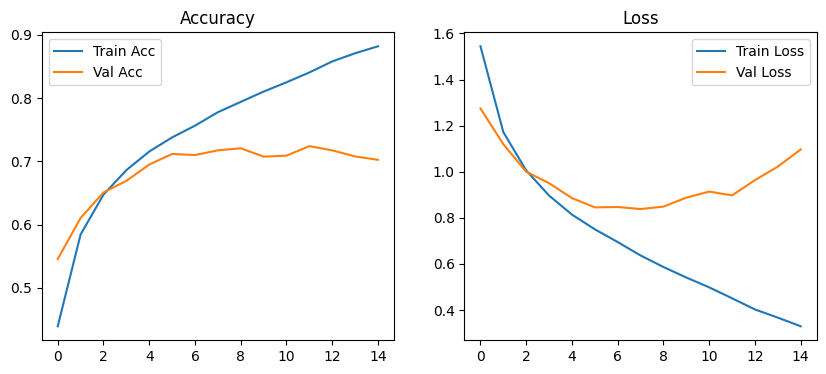

In [29]:
# Plot to visualize
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()